In [4]:
import sys
import read_lgal_advance as lgal
import LGalaxies_Henriques2015a_struct as lgal_struct
import matplotlib
import numpy as np
import numpy
import matplotlib.pyplot as plt

%matplotlib inline  
fl = lgal_struct.PropertiesToRead
dt = lgal_struct.LGalaxiesStruct

path = "../../rad_plot/sam_test/output/"
first = 0
last = 7
prefix = "SA_z0.09"
a = lgal.readsnap_lgal_advance(path,prefix,first,last,fl,dt)
prefix = "SA_z0.00"
b = lgal.readsnap_lgal_advance(path,prefix,first,last,fl,dt)

Read  ../../rad_plot/sam_test/output/ file 0 - 7 : 0.11732697486877441 s
Read  ../../rad_plot/sam_test/output/ file 0 - 7 : 0.09560012817382812 s


In [5]:
c = """7.06520      7.31520     0.216271    0.0755382\n
      7.31520      7.56520     0.204020    0.0712595\n
      7.56520      7.81520     0.151049    0.0527579\n
      7.81520      8.06520     0.112048    0.0391356\n
      8.06520      8.31520    0.0762307    0.0266256\n
      8.31520      8.56520    0.0560568    0.0135117\n
      8.56520      8.81520    0.0423269    0.0102622\n
      8.81520      9.06520    0.0331105   0.00837041\n
      9.06520      9.31520    0.0256968   0.00525948\n
      9.31520      9.56520    0.0214038   0.00473875\n
      9.56520      9.81520    0.0195365   0.00418913\n
      9.81520      10.0652    0.0186109   0.00360372\n
      10.0652      10.3152    0.0152146   0.00202494\n
      10.3152      10.5652    0.0107248   0.00209060\n
      10.5652      10.8152   0.00517901  0.000978219\n
      10.8152      11.0652   0.00142977  0.000428163\n
      11.0652      11.3152  0.000139376  0.000104390"""
d = """7.19020    -0.558757
      7.44020    -0.731684
      7.69020    -0.894178
      7.94020     -1.04797
      8.19020     -1.18301
      8.44020     -1.29786
      8.69020     -1.42411
      8.94020     -1.53341
      9.19020     -1.63278
      9.44020     -1.72506
      9.69020     -1.78331
      9.94020     -1.84144
      10.1902     -1.94810
      10.4402     -2.10675
      10.6902     -2.38943
      10.9402     -2.88977
      11.1902     -3.61282
      11.4402     -4.35713
      11.6902     -5.27807
      11.9402     -6.59732
      12.1902     -7.14139"""
obs = numpy.fromstring(c,dtype=float, sep=' ')
obs = obs.reshape([17,4])
x_obs = 0.5*(obs[:,0]+obs[:,1])
y_obs = obs[:,2]
lg = numpy.fromstring(d,dtype=float, sep=' ')
lg = lg.reshape([21,2])
x_lg = lg[:,0]
y_lg = 10**(lg[:,1])

In [6]:
gadget2msun = 1e10
hubble_h = 0.68
boxsize = 12.5

def stellar_mass_fn(gal,mass_min=1.,mass_max=1.e20,nbins=17):
    massf = numpy.log10(gadget2msun*(gal['DiskMass']+gal['BulgeMass'])*hubble_h)
    stellarmass = numpy.histogram(massf,nbins,(numpy.log10(mass_min),numpy.log10(mass_max)))
    massftn_y = stellarmass[0]/(boxsize)**3/(numpy.log10(mass_max/mass_min)/nbins)
    massftn_x = []
    for i in range(len(stellarmass[0])):
        massftn_x.append((stellarmass[1][i]+stellarmass[1][i+1])/2.)
    return (massftn_x,massftn_y)
m = stellar_mass_fn(a[3],mass_min=1e7,mass_max=1e12,nbins=30)
m2 = stellar_mass_fn(b[3],mass_min=1e7,mass_max=1e12,nbins=30)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


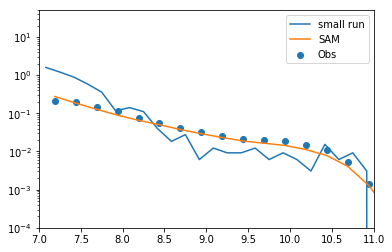

In [12]:
#plt.plot(m[0],m[1],c="r")
plt.plot(m[0],m[1],label="small run")
plt.plot(x_lg, y_lg, label="SAM")
plt.scatter(x_obs,y_obs, label="Obs")
plt.xlim([7,11])
plt.ylim([0.0001,50])
plt.yscale("log")
plt.legend()